In [1]:
import pynamical
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay
%matplotlib inline

In [2]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

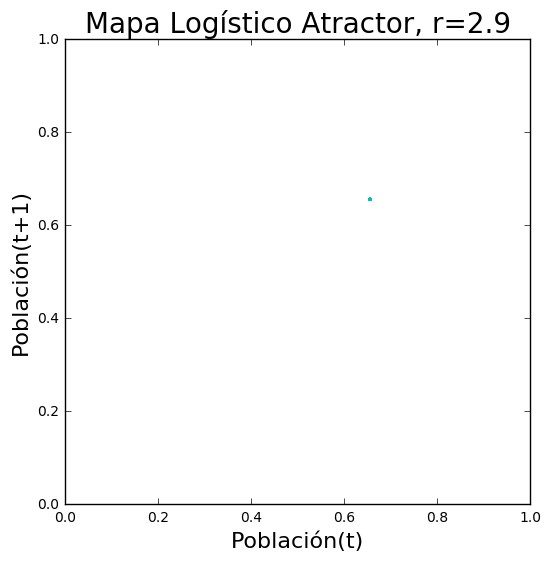

In [12]:
pops = simulate(num_gens=100, rate_min=2.9, num_rates=1, num_discard=100)
phase_diagram(pops, xlabel='Población(t)',ylabel='Población(t+1)', title='Mapa Logístico Atractor, r=2.9', color='c', size=20)

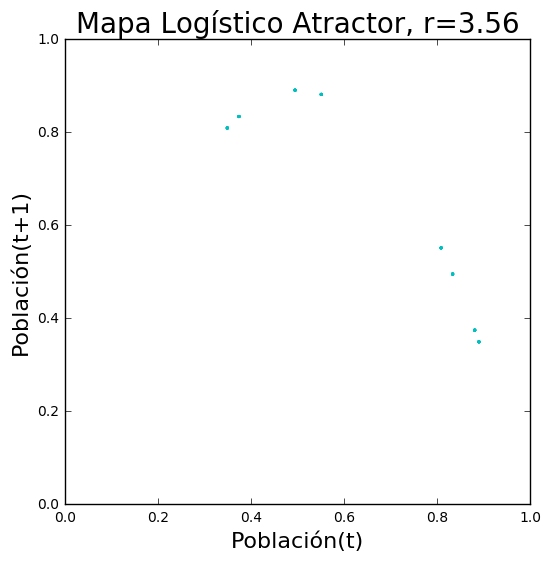

In [11]:
pops = simulate(num_gens=100, rate_min=3.56, num_rates=1, num_discard=100)
phase_diagram(pops, xlabel='Población(t)',ylabel='Población(t+1)', color='c', title='Mapa Logístico Atractor, r=3.56', size=20)

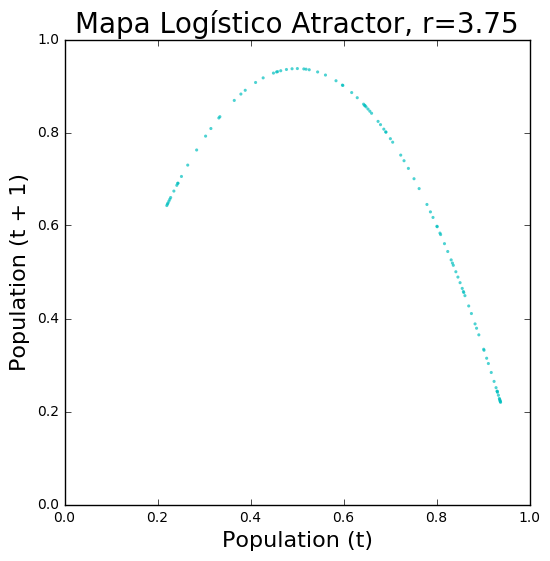

In [7]:
pops = simulate(num_gens=100, rate_min=3.75, num_rates=1, num_discard=100)
phase_diagram(pops, title='Mapa Logístico Atractor, r=3.75', color='c', size=20)

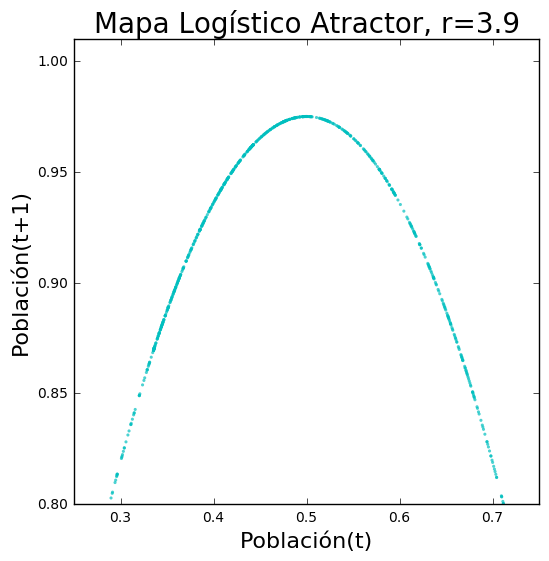

In [14]:
pops = simulate(num_gens=2000, rate_min=3.9, num_rates=1)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=20, xlabel='Población(t)', ylabel='Población(t+1)', title='Mapa Logístico Atractor, r=3.9',color='c')

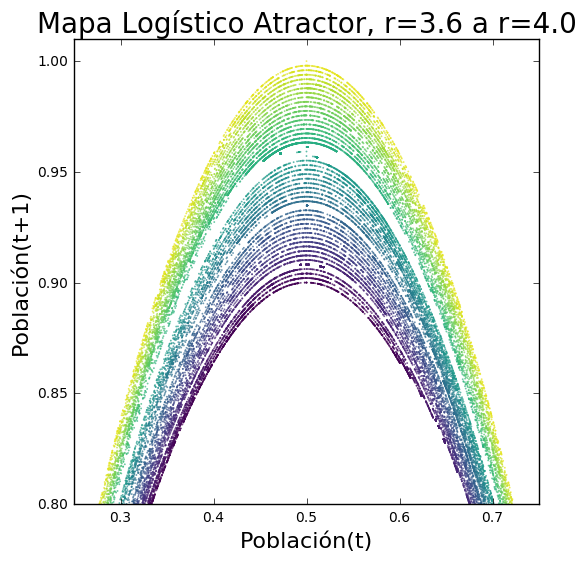

In [16]:
pops = simulate(num_gens=2000, rate_min=3.6, rate_max=4.0, num_rates=50)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=7, xlabel='Población(t)',ylabel='Población(t+1)',
              title='Mapa Logístico Atractor, r=3.6 a r=4.0', color='viridis')

In [17]:
total_gens = 30000
gens = 1000
np.random.seed(1)

chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)

random_pops = pd.DataFrame(np.random.random(gens), columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['caos', 'aleatorio']
time_series.head()

,caos,aleatorio
0,0.900520,0.417022
1,0.357438,0.720324
2,0.916407,0.000114
3,0.305654,0.302333
4,0.846796,0.146756


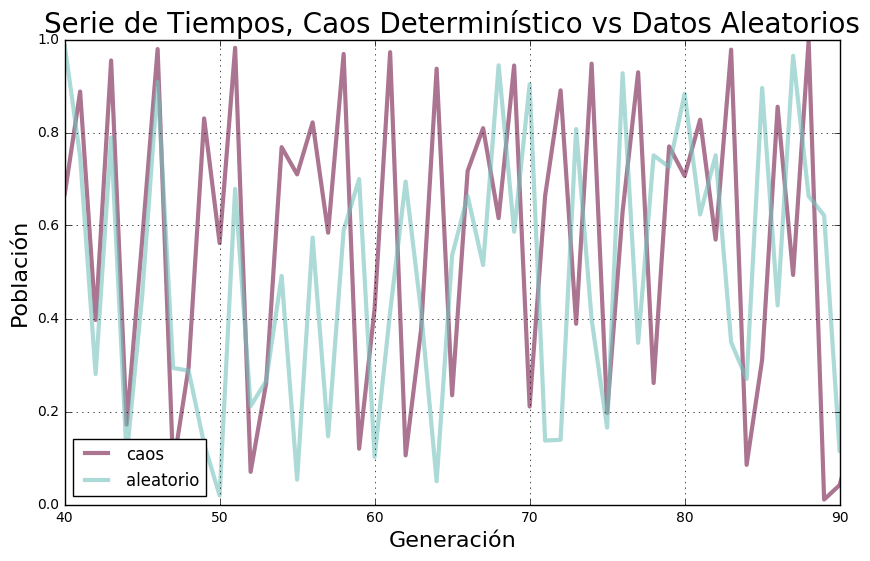

In [18]:
ax = time_series.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#741747','#74c2bd'])
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Serie de Tiempos, Caos Determinístico vs Datos Aleatorios', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(loc=3)

save_fig('caos-v-aleatorio')
plt.show()

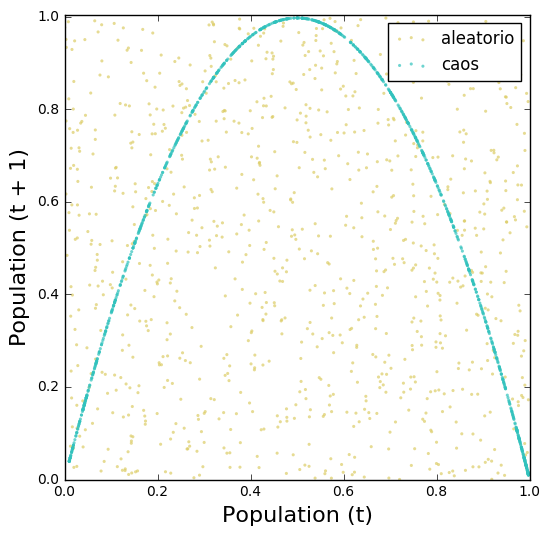

In [21]:
pops = pd.concat([chaos_pops, random_pops], axis=1)
pops.columns = ['caos', 'aleatorio']
phase_diagram(pops, size=20, color=['#dccc65','#31c2bd'], ymax=1.005, legend=True, 
              filename='atractorlog-caosvaleatorio')

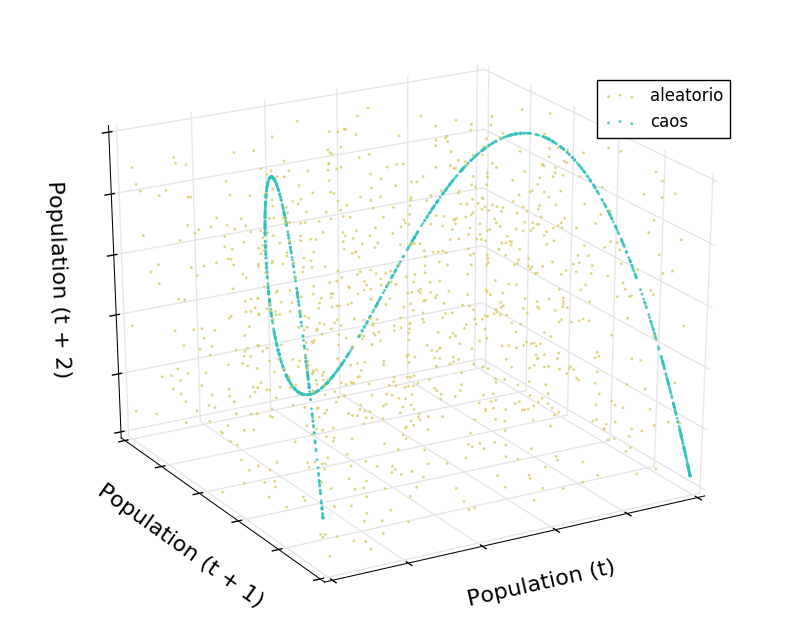

In [22]:
phase_diagram_3d(pops, color=['#dccc65','#31c2bd'], filename='atractorlogistico-3d',
                 legend=True, legend_bbox_to_anchor=(0.94, 0.9))

In [23]:
pops = simulate(num_gens=4000, rate_min=3.6, rate_max=4.0, num_rates=50)

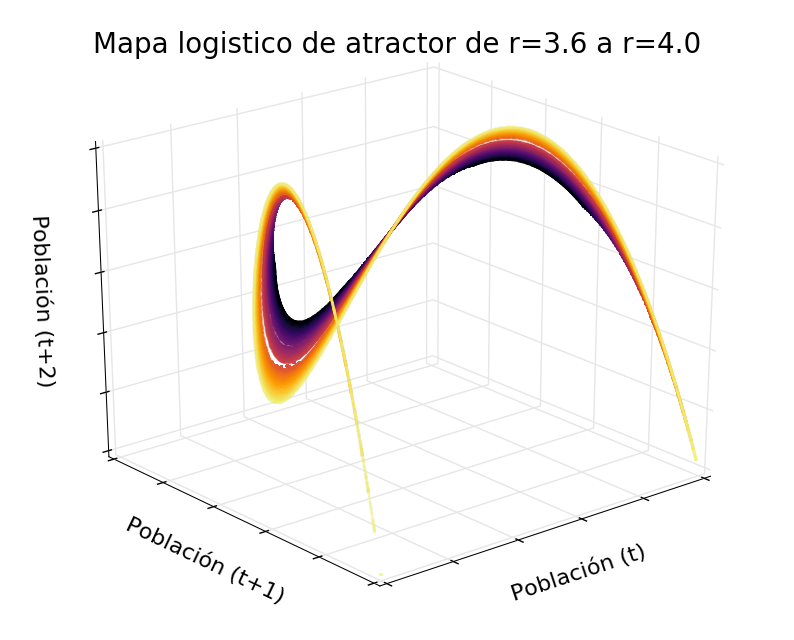

In [24]:
phase_diagram_3d(pops, title='Mapa logistico de atractor de r=3.6 a r=4.0', alpha=0.1, color='inferno', color_reverse=False, 
                 azim=230, filename='mapalogistico',
                 xlabel='Población (t)', ylabel='Población (t+1)', zlabel='Población (t+2)')

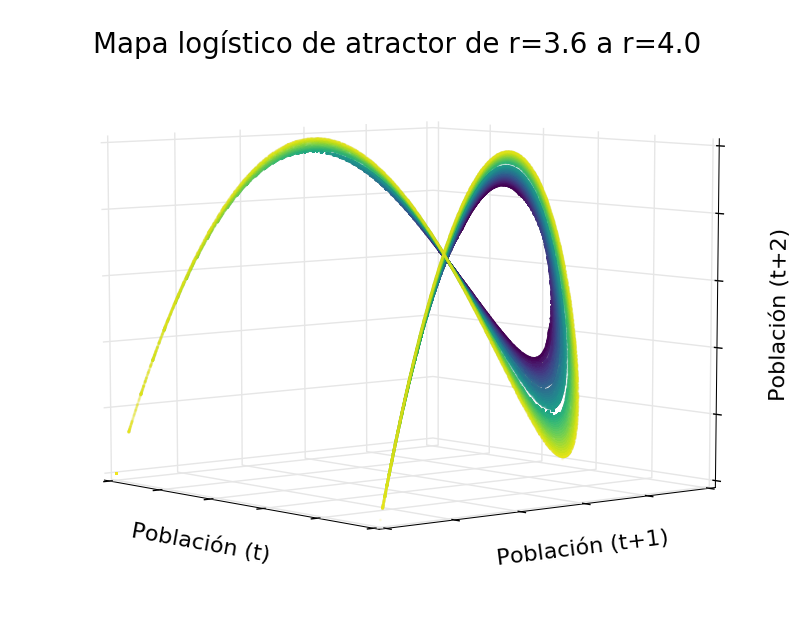

In [27]:
phase_diagram_3d(pops, title='Mapa logístico de atractor de r=3.6 a r=4.0', alpha=0.1, color='viridis', color_reverse=False, 
                 elev=7, azim=320, filename='3d-logistic-map-attractor-2', 
                 xlabel='Población (t)', ylabel='Población (t+1)', zlabel='Población (t+2)')